We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.DataFrame({"Max": [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
              "Min": [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})
df

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21
9,29,19


In [4]:
Y_Max = df["Max"]
Y_Min = df["Min"]

In [5]:
Month = np.arange(0,12)

Text(0, 0.5, 'Min &  Max Temperature($^\\circ$C) ')

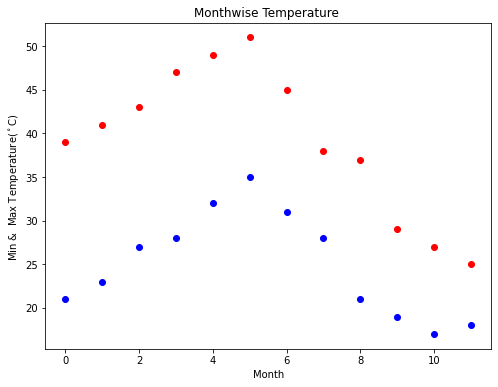

In [6]:
plt.figure(figsize = (8,6))
plt.plot(Month,Y_Max,"ro")
plt.plot(Month,Y_Min,"bo")
plt.title("Monthwise Temperature ")
plt.xlabel("Month")
plt.ylabel("Min &  Max Temperature($^\circ$C) ")

In [7]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Month,
                                      Y_Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Month,
                                      Y_Min, [-40, 20, 0])

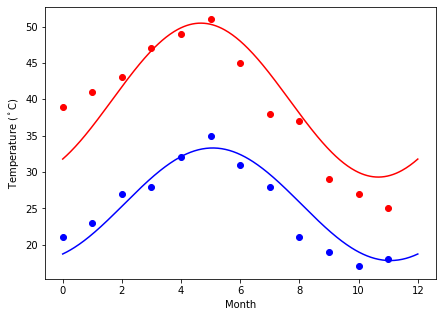

In [8]:
days = np.linspace(0, 12, num=365)
plt.figure(figsize = (7,5))
plt.plot(Month, Y_Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Month, Y_Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

**This assignment is for visualization using matplotlib:**

**Data to use:**

**url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv**

In [9]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic  = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
gender = titanic['sex'].astype('category')
gender = gender.cat.codes
gender.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

**1. Create a pie chart presenting the male/female proportion**

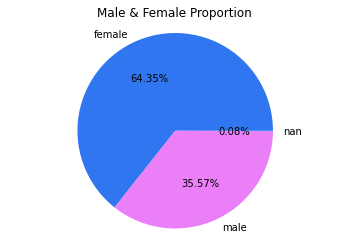

In [11]:
plt.pie(gender.value_counts(),labels = titanic['sex'].unique() ,colors = {'#EB7FF8','#3076F0'} , autopct = "%0.2f%%")
plt.title('Male & Female Proportion')
plt.axis('equal')
plt.show()

**2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**

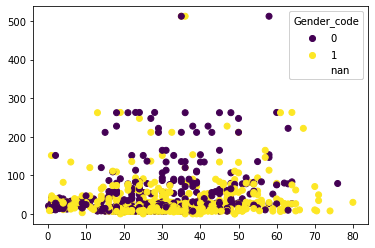

In [14]:
fig,ax = plt.subplots()
scatter = ax.scatter(titanic['age'] ,titanic['fare'] ,c = gender )
legend = ax.legend(*scatter.legend_elements(),loc = 'best',title = 'Gender_code')
ax.add_artist(legend)
plt.show()

**SCATTER PLOT USING SEABORN(RELPLOT)**

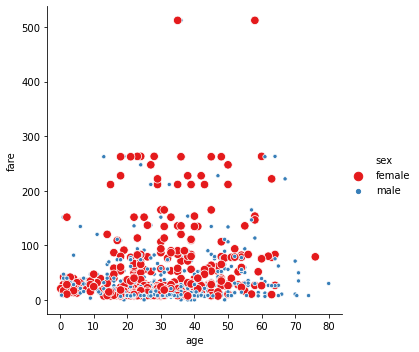

In [23]:
import seaborn as sns
sns.relplot(x = 'age', y = 'fare', data = titanic, hue = 'sex',palette = 'Set1',size = 'sex')